## Training Model

1. DecisionTreeClassifier - 86%
2. RandomForestClassifier - 90%
3. GradientBoostingClassifier - 90%
4. AdaBoostClassifier - 86%

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pickle
with open("processing.pkl","rb") as file:
    data1 = pickle.load(file)

In [9]:
data1

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,3,1.0,5,18,2,0.102061,3,4,...,4,-0.170645,-0.622235,2,0.468778,0.749766,-0.681372,1.100251,0,3
1,1.109888,1,3,1.0,5,18,2,0.591464,4,4,...,4,1.112397,-0.622235,3,-0.012431,0.749766,-0.370834,0.817773,0,3
2,0.339260,1,5,2.0,5,18,1,-0.509693,4,4,...,3,1.112397,-0.622235,3,1.752001,2.410786,-0.370834,2.230163,0,4
3,0.449349,1,0,0.0,2,11,2,0.102061,4,2,...,2,1.497310,-0.622235,2,2.233210,0.472929,3.045084,0.535296,0,3
4,2.541054,1,3,1.0,5,18,2,0.836165,4,1,...,4,-0.170645,-1.414051,3,-0.814446,-0.634417,-0.060296,-0.594616,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,0,4,0.0,5,18,1,-0.754394,1,4,...,2,-0.683861,0.169581,3,-0.172834,0.196093,-0.681372,-0.029660,0,4
1196,0.008991,1,5,1.0,4,12,2,0.102061,2,4,...,1,-0.940470,-0.622235,3,-0.974849,-1.188091,-0.681372,-1.159572,0,3
1197,1.440157,1,4,2.0,4,12,2,2.304373,1,4,...,3,1.112397,0.169581,3,2.072807,1.026603,0.250242,1.100251,0,3
1198,-0.321278,0,4,1.0,0,5,2,-0.020290,3,4,...,2,-0.298949,0.169581,4,0.147972,0.749766,1.492394,0.817773,0,3


## Model Selection

In [15]:
#Split into x and y
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [17]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 26), (240, 26), (960,), (240,))

In [21]:
#Balancing the data
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE()
print("Before SMOTE : ",Counter(y_train))
x_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("After SMOTE : ",Counter(y_train_sm))

Before SMOTE :  Counter({3: 690, 2: 165, 4: 105})
After SMOTE :  Counter({2: 690, 3: 690, 4: 690})


## 1. Decision Tree
Reasons for choosing this model:

- Robust algorithm
- Not sensitive to outliers and scaling

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [25]:
# Training Accuracy
y_pred_train = dt.predict(x_train_sm) 
print(classification_report(y_pred_train,y_train_sm))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       690
           4       1.00      1.00      1.00       690

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070



In [29]:
# Testing Accuracy
y_pred = dt.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           2       0.72      0.68      0.70        31
           3       0.90      0.93      0.92       178
           4       0.78      0.68      0.72        31

    accuracy                           0.87       240
   macro avg       0.80      0.76      0.78       240
weighted avg       0.86      0.87      0.86       240



### HyperParameter Tuning

In [71]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
tree_clf = DecisionTreeClassifier(random_state=42)
tree_gcv = GridSearchCV(tree_clf, param_grid=params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_gcv.fit(x_train_sm,y_train_sm)
best_params = tree_gcv.best_params_
print(f"Best parameters : {best_params}")

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [73]:
dt_classifier = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter='best')
dt_classifier.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=5)

In [75]:
#training accuracy
y_pred_train2 = dt_classifier.predict(x_train_sm)
print(classification_report(y_pred_train2,y_train_sm))

              precision    recall  f1-score   support

           2       0.98      0.92      0.95       738
           3       0.90      0.92      0.91       677
           4       0.92      0.97      0.94       655

    accuracy                           0.94      2070
   macro avg       0.94      0.94      0.94      2070
weighted avg       0.94      0.94      0.94      2070



In [77]:
#testing accuracy
y_pred_test = dt_classifier.predict(X_test)
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           2       0.79      0.61      0.69        38
           3       0.89      0.95      0.92       173
           4       0.74      0.69      0.71        29

    accuracy                           0.86       240
   macro avg       0.81      0.75      0.77       240
weighted avg       0.86      0.86      0.86       240



In [79]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(dt_classifier,X,y,cv=3)
print(cross_validation)
print(cross_validation.mean())
print(cross_validation.std())

[0.865  0.945  0.8375]
0.8825
0.04559788006768148


In [82]:
cm = pd.crosstab(y_pred_test,y_test)
cm

PerformanceRating,2,3,4
row_0,,,
2,23,15,0
3,2,164,7
4,4,5,20


In [84]:
dt_classifier.feature_importances_

array([0.00339015, 0.        , 0.        , 0.        , 0.01512566,
       0.01509444, 0.01047665, 0.00114764, 0.        , 0.33044039,
       0.00508722, 0.        , 0.00224967, 0.00309862, 0.        ,
       0.0035162 , 0.39503725, 0.        , 0.00425301, 0.        ,
       0.01658702, 0.00160669, 0.01996458, 0.16201977, 0.01090505,
       0.        ])

In [86]:
dt_classifier.feature_importances_ > dt_classifier.feature_importances_.mean()

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False])

In [88]:
dt_classifier.feature_importances_.mean()

0.038461538461538464

In [90]:
x_train_1 = x_train_sm.columns[dt_classifier.feature_importances_ > dt_classifier.feature_importances_.mean()]
x_train_1

Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'YearsSinceLastPromotion'],
      dtype='object')

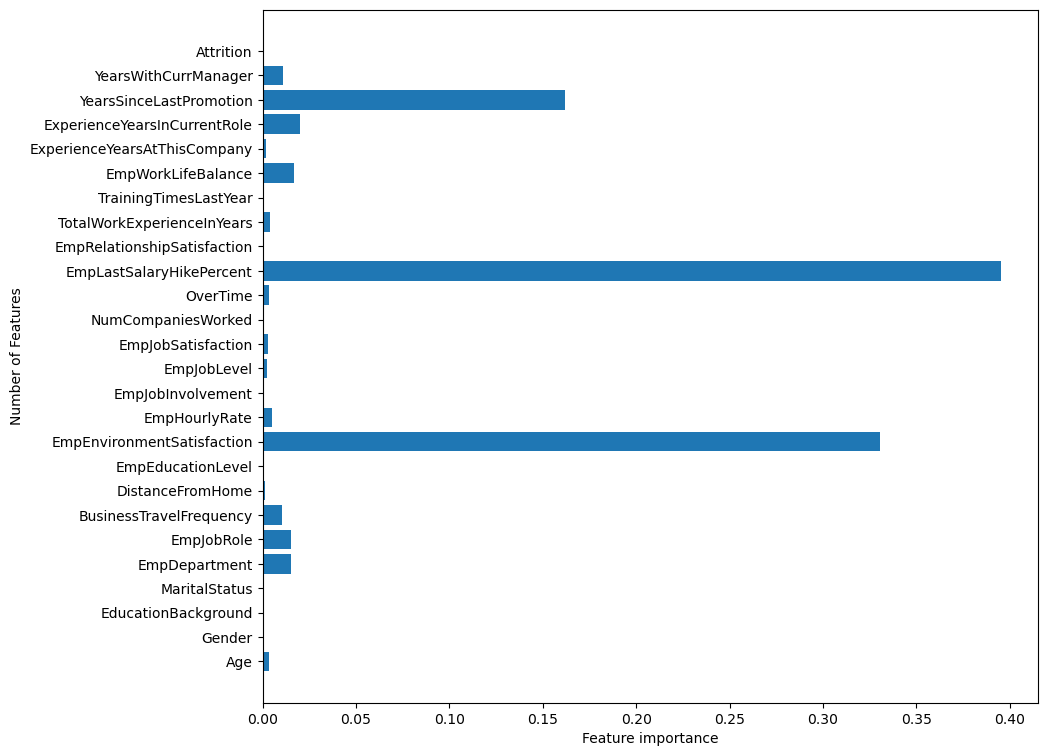

In [92]:
plt.figure(figsize=(10,9))
plt.barh(x_train_sm.columns, dt_classifier.feature_importances_)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [ ]:
#The most important features are:
# - EmpLastSalaryHikePercent (38%)
# - EmpEnvironmentSatisfaction (32%)
# - YearsSinceLastPromotion (17%)

## 2. Random Forest

In [94]:
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [96]:
y_pred_train_rf = rf.predict(x_train_sm)  #Training accuracy
print(classification_report(y_pred_train_rf,y_train_sm))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       690
           4       1.00      1.00      1.00       690

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070



In [98]:
y_pred_test_rf = rf.predict(X_test)   #Testing accuracy
print(classification_report(y_pred_test_rf,y_test))

              precision    recall  f1-score   support

           2       0.86      0.69      0.77        36
           3       0.92      0.94      0.93       181
           4       0.70      0.83      0.76        23

    accuracy                           0.89       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.89      0.89      0.89       240



### HyperParameter Tuning

In [114]:
random_grid = {
    'n_estimators': [50,65,80,100,250,400,600], 
    'max_features': ['auto','sqrt'],
    'max_depth': [5, 6, 7, 8, 9, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'bootstrap' : [True,False] 
}

rf1 = RandomForestClassifier(random_state=42)
rcv = RandomizedSearchCV(estimator=rf1, scoring='accuracy', param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rcv.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 65, 80, 100, 250,
                                                         400, 600]},
                   random_state=42, scoring='accuracy', verbose=2)

In [116]:
rcv.best_score_

0.9444444444444444

In [118]:
rf_best_params = rcv.best_params_
print(f"Best parameters : {rf_best_params}")

Best parameters : {'n_estimators': 65, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [120]:
rf2 = RandomForestClassifier(n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=10, bootstrap=False)
rf2.fit(x_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=10,
                       n_estimators=65)

In [122]:
y_pred_train_rf = rf2.predict(x_train_sm)
print(classification_report(y_pred_train_rf,y_train_sm))

              precision    recall  f1-score   support

           2       1.00      0.97      0.98       710
           3       0.97      1.00      0.98       671
           4       1.00      1.00      1.00       689

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070



In [124]:
y_predict_rf = rf2.predict(X_test)
print(classification_report(y_predict_rf,y_test))

              precision    recall  f1-score   support

           2       0.86      0.68      0.76        37
           3       0.92      0.95      0.94       179
           4       0.74      0.83      0.78        24

    accuracy                           0.90       240
   macro avg       0.84      0.82      0.83       240
weighted avg       0.90      0.90      0.89       240



In [128]:
cv_score = cross_val_score(rf2,X,y,cv=5)
print(cv_score)
print(cv_score.mean())
print(cv_score.std())

[0.89583333 0.94166667 0.9875     0.89166667 0.89583333]
0.9225
0.03732365946093115


In [130]:
pd.crosstab(y_predict_rf,y_test)

PerformanceRating,2,3,4
row_0,,,
2,25,12,0
3,2,170,7
4,2,2,20


In [132]:
print(rf2.feature_importances_)

[0.01230507 0.00708821 0.00525318 0.01746282 0.01990229 0.02527195
 0.00841878 0.01266268 0.01080133 0.23638628 0.01630759 0.00713019
 0.00581389 0.0051716  0.00736518 0.02411785 0.30877919 0.00891145
 0.01263321 0.01217054 0.01718551 0.02794739 0.04859923 0.11750525
 0.02287556 0.00193379]


In [134]:
rf2.feature_importances_.mean()

0.038461538461538464

In [136]:
x_train_2 = x_train_sm.columns[rf2.feature_importances_ > rf2.feature_importances_.mean()]
x_train_2

Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

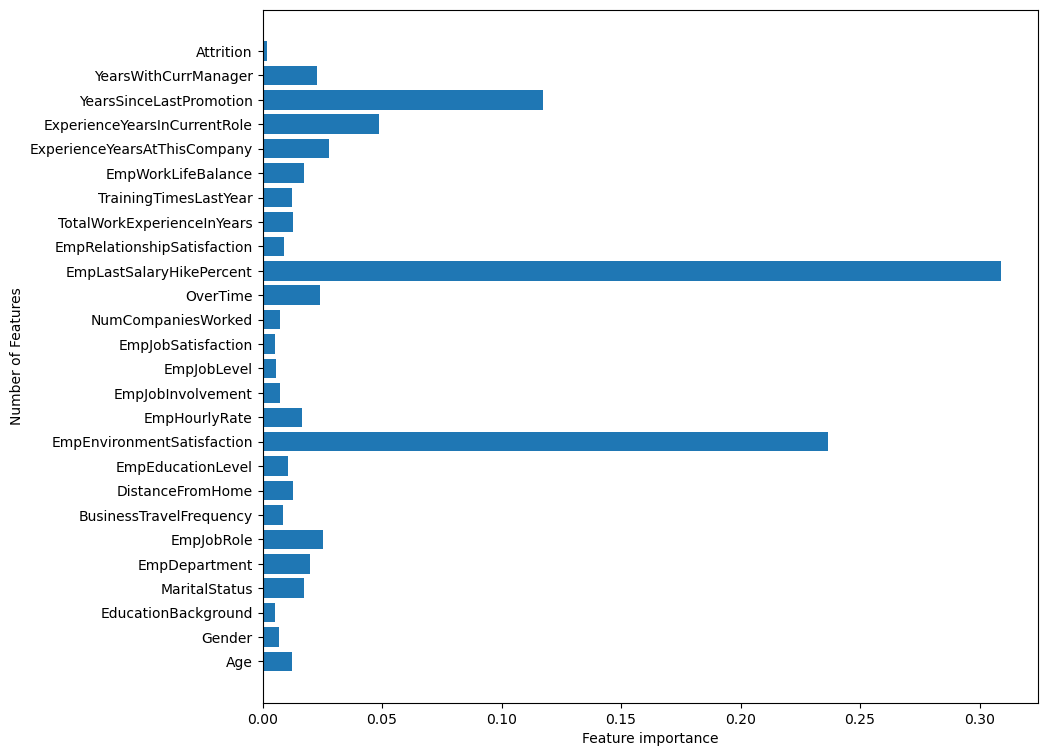

In [138]:
plt.figure(figsize=(10,9))
plt.barh(X_test.columns, rf2.feature_importances_)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [ ]:
#The top 3 significant features influencing the employee performance ratings:
#1. EmpLastSalaryHikePercent (29%)
#2. EmpEnvironmentSatisfaction (23%)
#3. YearsSinceLastPromotion (12%)

## 3. Gradient Boosting

In [482]:
gb = GradientBoostingClassifier()
gb.fit(x_train_sm, y_train_sm)
gb_train_pred = gb.predict(x_train_sm)
print(classification_report(gb_train_pred,y_train_sm)) #Training accuracy

              precision    recall  f1-score   support

           2       1.00      0.98      0.99       700
           3       0.98      0.99      0.99       682
           4       1.00      1.00      1.00       688

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070



In [484]:
gb_test_pred = gb.predict(X_test)
print(classification_report(gb_test_pred,y_test)) #Testing accuracy

              precision    recall  f1-score   support

           2       0.86      0.69      0.77        36
           3       0.92      0.94      0.93       179
           4       0.74      0.80      0.77        25

    accuracy                           0.89       240
   macro avg       0.84      0.81      0.82       240
weighted avg       0.89      0.89      0.89       240



In [486]:
cv_scores = cross_val_score(gb,X,y,cv=3)
print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[0.9275 0.965  0.9   ]
0.9308333333333333
0.02664061227190961


In [307]:
gb.feature_importances_ 

array([8.45715844e-03, 1.23518572e-03, 1.78389402e-03, 6.86703043e-03,
       5.50547157e-03, 8.51553628e-03, 9.64887178e-03, 3.78466391e-03,
       1.24212765e-03, 3.22746340e-01, 3.34638250e-03, 2.51099085e-03,
       8.21569928e-04, 1.18308970e-03, 1.72990170e-03, 1.51175881e-02,
       3.13752387e-01, 1.73019715e-03, 6.22458474e-03, 3.60646782e-03,
       2.33276247e-02, 5.60990824e-03, 4.68607744e-02, 1.93927358e-01,
       1.02341091e-02, 2.30786257e-04])

In [295]:
gb.feature_importances_.mean()

0.03846153846153847

In [301]:
x_test.columns[gb.feature_importances_ > gb.feature_importances_.mean()]

Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

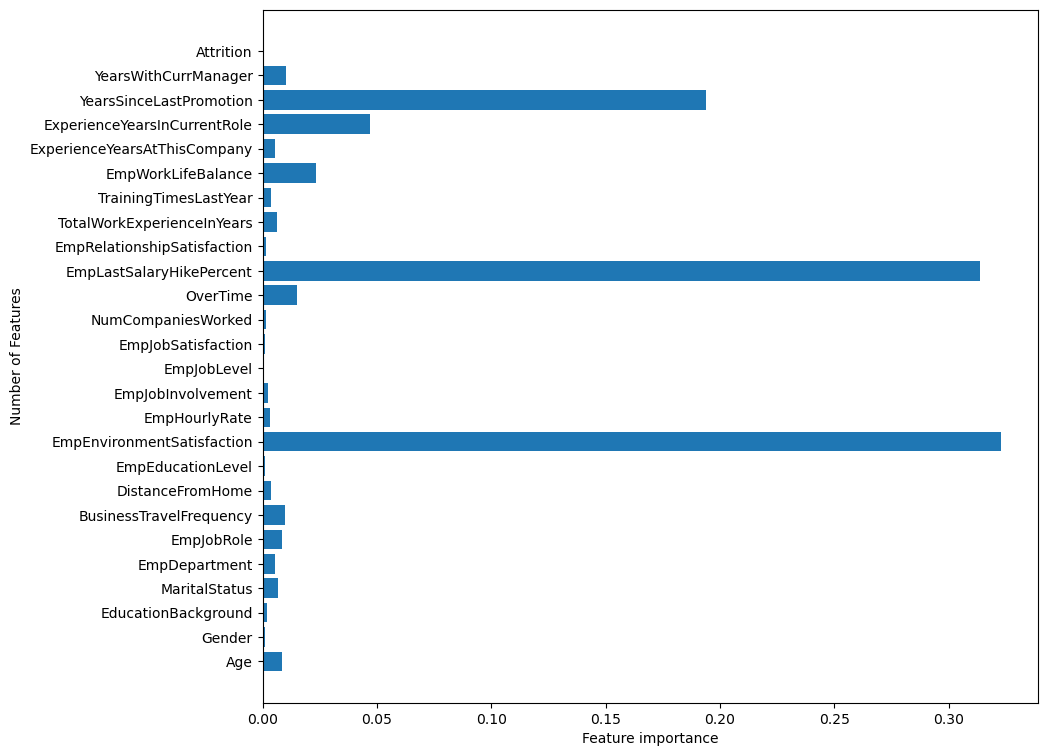

In [303]:
plt.figure(figsize=(10,9))
plt.barh(x_train_sm.columns, gb.feature_importances_)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [ ]:
# Top 3 important features include:
# 1. EmpEnvironmentSatisfaction
# 2. EmpLastSalaryHikePercent
# 3. YearsSinceLastPromotion

### HyperParameter Tuning

In [488]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50,100,150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_1 = GradientBoostingClassifier()

gb_rcv = RandomizedSearchCV(estimator=gb_1, scoring='accuracy', param_distributions=param_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1)
gb_rcv.fit(x_train_sm,y_train_sm)
cv_best_params = gb_rcv.best_params_
print(cv_best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}


In [389]:
gb2 = GradientBoostingClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=5, learning_rate=0.2)
gb2.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=150)

In [391]:
#Training accuracy
gb_train_pred = gb2.predict(x_train_sm)
print(classification_report(gb_train_pred,y_train_sm))
#Testing accuracy
y_pred=gb2.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       690
           4       1.00      1.00      1.00       690

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

              precision    recall  f1-score   support

           2       0.86      0.71      0.78        35
           3       0.93      0.95      0.94       182
           4       0.74      0.87      0.80        23

    accuracy                           0.90       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.91      0.90      0.90       240



In [225]:
#This overfits so we go without hyperparameter tuning

## 4. AdaBoost

In [231]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train_sm,y_train_sm)

AdaBoostClassifier()

In [237]:
#Training accuracy
ad_y_train = ada.predict(x_train_sm)
print(classification_report(ad_y_train,y_train_sm))
#Testing accuracy
ad_y_pred = ada.predict(x_test)
print(classification_report(ad_y_pred,y_test))

              precision    recall  f1-score   support

           2       0.95      0.90      0.92       734
           3       0.88      0.89      0.88       682
           4       0.90      0.94      0.92       654

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070

              precision    recall  f1-score   support

           2       0.72      0.64      0.68        33
           3       0.91      0.91      0.91       184
           4       0.67      0.78      0.72        23

    accuracy                           0.86       240
   macro avg       0.77      0.78      0.77       240
weighted avg       0.86      0.86      0.86       240



In [239]:
ada.feature_importances_

array([0.01945955, 0.        , 0.02044453, 0.06618287, 0.        ,
       0.01320225, 0.        , 0.01537987, 0.        , 0.20503905,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02923488, 0.20279263, 0.        , 0.01424641, 0.        ,
       0.13228871, 0.01147807, 0.07191037, 0.19834083, 0.        ,
       0.        ])

In [241]:
ada.feature_importances_.mean()

0.03846153846153846

In [245]:
x_train_sm.columns[ada.feature_importances_ > ada.feature_importances_.mean()]

Index(['MaritalStatus', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

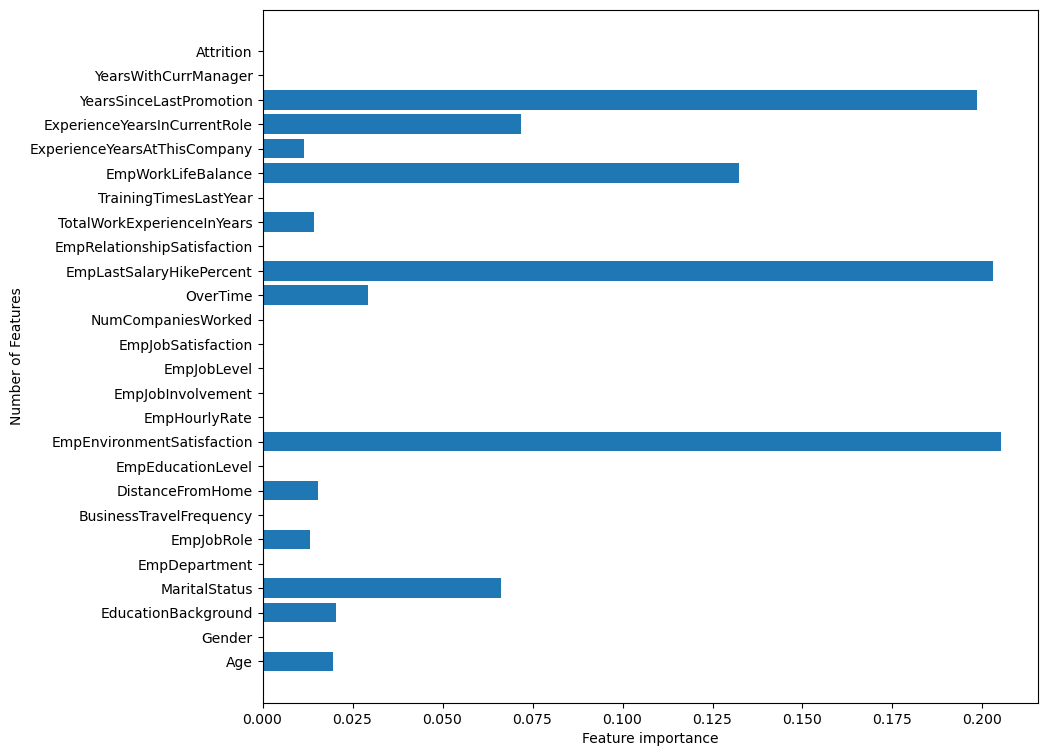

In [247]:
plt.figure(figsize=(10,9))
plt.barh(x_train_sm.columns, ada.feature_importances_)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [ ]:
#Top 3 important features:
# 1. EmpLastSalaryHikePercent (20.5%)
# 2. EmpEnvironmentSatisfaction (20.2%)
# 3. YearsSinceLastPromotion (19%)

### Model to predict important factors as input

In [152]:
data2=data1[['EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','YearsSinceLastPromotion','PerformanceRating']]

In [154]:
x=data2.iloc[:,:-1]
y=data2.iloc[:,-1]

In [166]:
x.shape

(1200, 3)

In [172]:
y.shape

(1200,)

In [156]:
rf2.fit(x,y)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=10,
                       n_estimators=65)

In [158]:
y_p = rf2.predict(x)

In [160]:
accuracy_score(y_p,y)

0.8975

In [164]:
with open("rf_model.pkl","wb") as f:
    pickle.dump(rf2,f)